In [19]:
working_dir = "/epyc/projects/dschaub/method-projects/spatialnca"
import os

os.chdir(working_dir)

import scanpy as sc
import matplotlib.pyplot as plt
from spatialnca.utils import spatial_scatter

## Load data

In [20]:
path = (
    "/epyc/projects/dschaub/data/domain-ident/zhuang_2023/processed/zhuang-abca-4.h5ad"
)
path = (
    "/epyc/projects/dschaub/data/domain-ident/zhuang_2023/processed/zhuang-abca-3.h5ad"
)
adata = sc.read_h5ad(path)
adata, adata.X.max()

(AnnData object with n_obs × n_vars = 1566842 × 1122
     obs: 'brain_section_label', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'cluster_alias', 'x', 'y', 'z', 'subclass_confidence_score', 'cluster_confidence_score', 'high_quality_transfer', 'abc_sample_id', 'x_ccf', 'y_ccf', 'z_ccf', 'parcellation_index', 'parcellation_organ', 'parcellation_category', 'parcellation_division', 'parcellation_structure', 'parcellation_substructure', 'parcellation_organ_color', 'parcellation_category_color', 'parcellation_division_color', 'parcellation_structure_color', 'parcellation_substructure_color', 'domain', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster'
     var: 'gene_identifier'
     obsm: 'spatial',
 495.0)

In [21]:
adata.obs.brain_section_label.unique()

['Zhuang-ABCA-3.023', 'Zhuang-ABCA-3.024', 'Zhuang-ABCA-3.017', 'Zhuang-ABCA-3.016', 'Zhuang-ABCA-3.010', ..., 'Zhuang-ABCA-3.021', 'Zhuang-ABCA-3.007', 'Zhuang-ABCA-3.013', 'Zhuang-ABCA-3.020', 'Zhuang-ABCA-3.009']
Length: 22
Categories (22, object): ['Zhuang-ABCA-3.001', 'Zhuang-ABCA-3.002', 'Zhuang-ABCA-3.003', 'Zhuang-ABCA-3.004', ..., 'Zhuang-ABCA-3.021', 'Zhuang-ABCA-3.022', 'Zhuang-ABCA-3.023', 'Zhuang-ABCA-3.024']

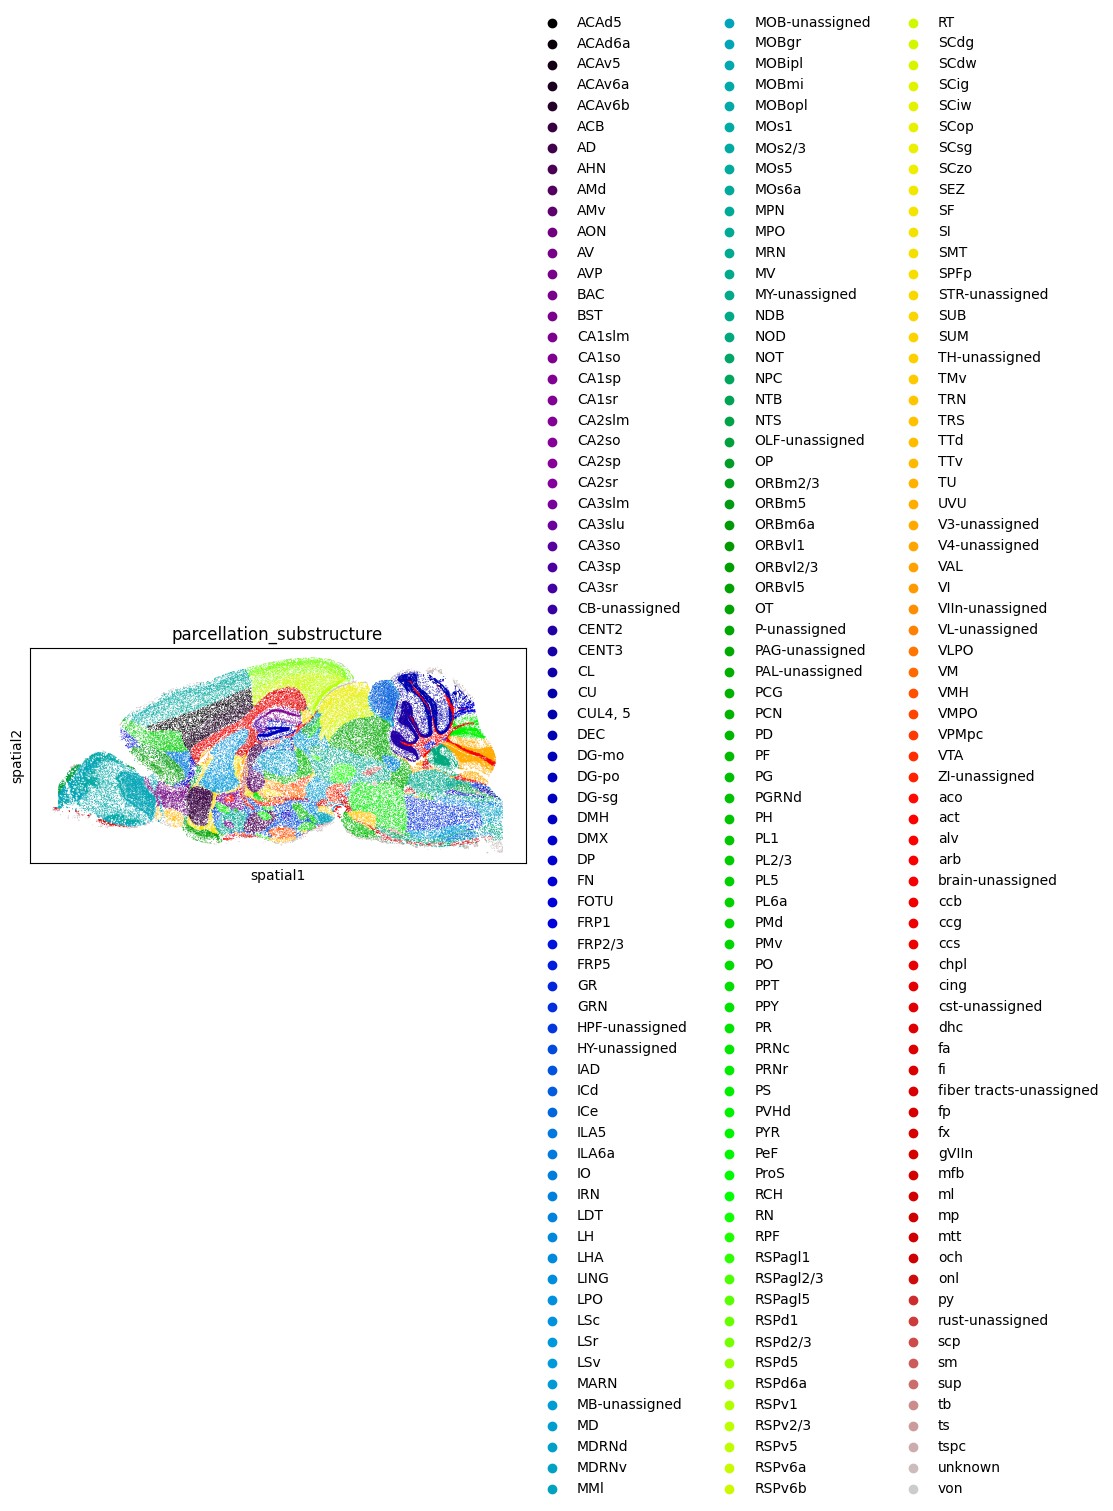

In [22]:
sample = "Zhuang-ABCA-4.003"
sample = "Zhuang-ABCA-3.003"

ad_sub = adata[adata.obs["brain_section_label"] == sample].copy()
sc.pl.spatial(
    ad_sub, color="parcellation_substructure", spot_size=0.025, palette="nipy_spectral"
)

In [23]:
coords = ad_sub.obsm["spatial"]
x, y = coords.T

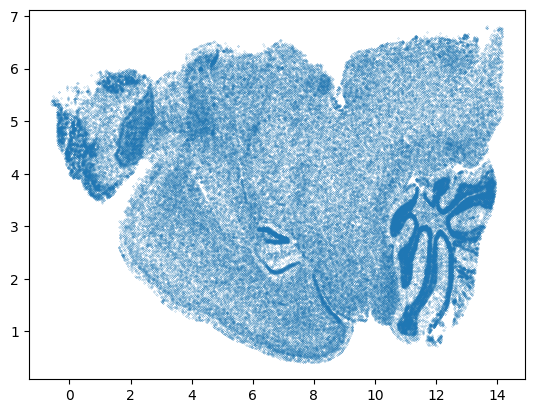

In [24]:
plt.scatter(x, y, s=0.02)

In [25]:
adata.obsm["spatial"].max(axis=0), adata.obsm["spatial"].min(axis=0)

(array([14.54989262,  7.53160259]), array([-1.02867457,  0.40588609]))

318


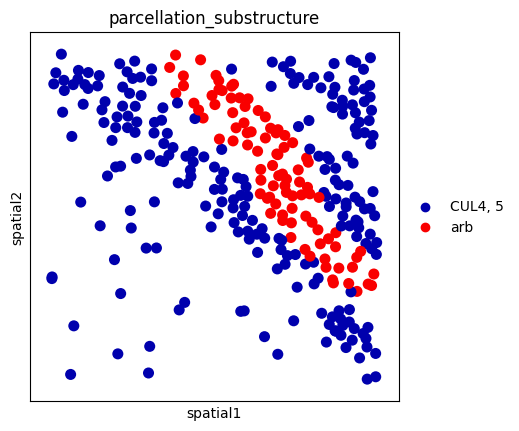

In [26]:
length = 0.3
x_min = 11.2
y_min = 1.5

x_max = x_min + length
y_max = y_min + length

# x_min, x_max = (11.5, 12)
# y_min, y_max = (1.5, 2)

mask_x = (x > x_min) & (x < x_max)
mask_y = (y > y_min) & (y < y_max)

mask = mask_x & mask_y
ad_sub_sub = ad_sub[mask].copy()
print(mask.sum())
sc.pl.spatial(ad_sub_sub, color="parcellation_substructure", spot_size=0.01)

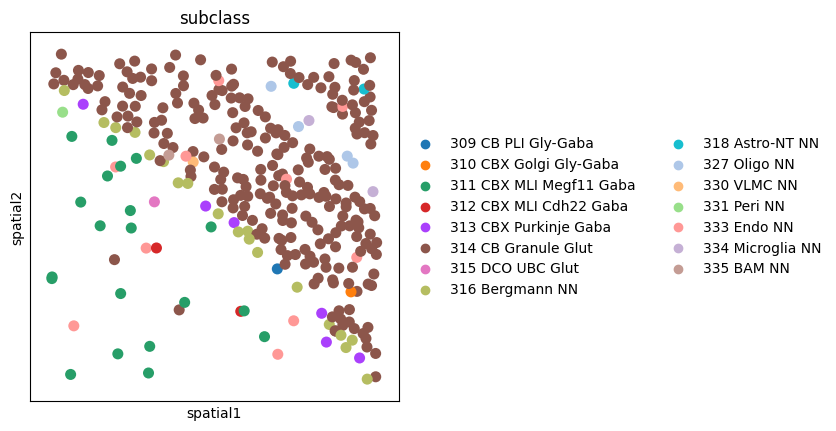

In [27]:
sc.pl.spatial(ad_sub_sub, color="subclass", spot_size=0.01)

In [30]:
# center the data around zero
ad_sub_sub.obsm["spatial"] = ad_sub_sub.obsm["spatial"] - ad_sub_sub.obsm[
    "spatial"
].mean(axis=0)

In [20]:
ad_sub_sub.write_h5ad(f"data/{sample}_slice.h5ad")

## Prepare kidney data

In [47]:
path = "/epyc/projects/dschaub/analysis-projects/tfh-project/data/xenium_cgn/TLS3_1_refined_tsub.h5ad"
adata = sc.read_h5ad(path)
adata, adata.X.max()

(AnnData object with n_obs × n_vars = 2755475 × 480
     obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'Slide_ID', 'batch', 'Patient_Sample_ID', 'Condition', 'n_genes', 'celltype_l1', 'celltype_l1_codes', 'celltype_l1_prob', 'Biopsy_ID', 'sample', 'label', 'nichepca_domain', 'nichepca_domain_tuned', 'nichepca_glom_no', 'glom_ID', 'polygon_flags', 'is_in_polygon', 'is_in_glom', 'is_in_periglom', 'Slide_num', 'TLS_grade', 'TLS_zone', 'TLS_grade_extended', 'is_T', 'is_B', 'tls_dbs', 'tls_dbs_filtered', 'tls_dbs_expanded', 'tls_final', 'tls_final_combined', 'celltype_tsub'
     var: 'gene_ids', 'feature_types'
     uns: 'celltype_l1_colors', 'neighbors', 'pca', 'umap'
     obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial', 'spatial_split'
     varm: 'PCs'
     layers: 'counts',
 3.4719665)

(27920, 480)


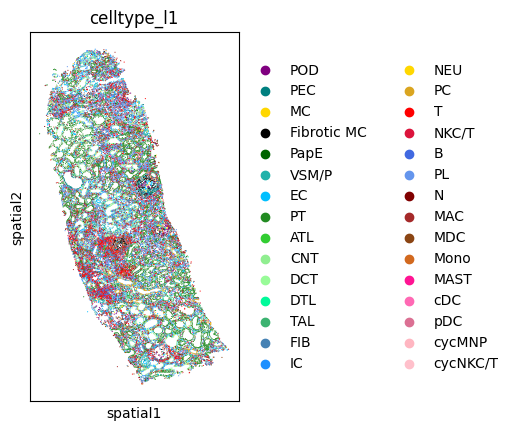

In [48]:
sample = "0011287 - X18"
ad_sub = adata[adata.obs["Biopsy_ID"] == sample].copy()
print(ad_sub.shape)

sc.pl.spatial(ad_sub, color="celltype_l1", spot_size=10)

8425.073437500001 10865.285264705884 10140.100710526318 13903.940916666666
(1134, 480)


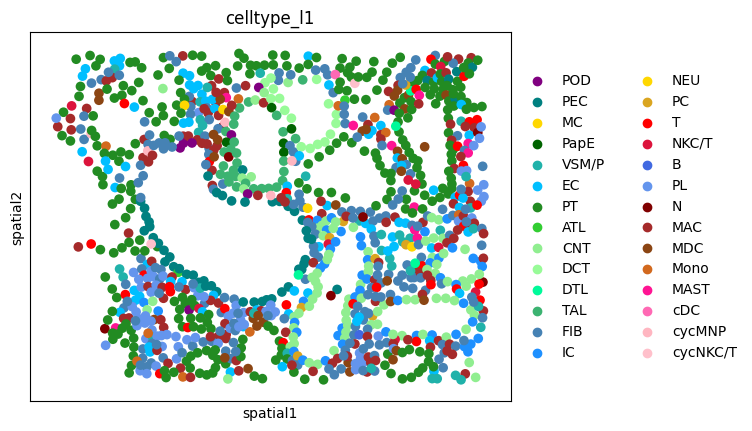

In [49]:
# cut in half

xmin, ymin = ad_sub.obsm["spatial"].min(axis=0)
xmax, ymax = ad_sub.obsm["spatial"].max(axis=0)

print(xmin, ymin, xmax, ymax)


# cut in half along y axis

mask_y_1 = ad_sub.obsm["spatial"][:, 1] < ymax - (ymax - ymin) / 1.8
mask_y_2 = ad_sub.obsm["spatial"][:, 1] > ymin + (ymax - ymin) / 3
mask_y = mask_y_1 & mask_y_2

mask_x = ad_sub.obsm["spatial"][:, 0] < xmin + (xmax - xmin) / 3

ad_sub_sub = ad_sub[mask_y & mask_x].copy()

print(ad_sub_sub.shape)

sc.pl.spatial(ad_sub_sub, color="celltype_l1", spot_size=10)

In [50]:
# divide coords by 1000
ad_sub_sub.obsm["spatial"] = ad_sub_sub.obsm["spatial"] / 1000

ad_sub_sub.X = ad_sub_sub.layers["counts"].copy()

In [51]:
ad_sub_sub.write_h5ad(f"data/xenium_cgn_{sample}_subset.h5ad")